# Introduction

In today's world, due to our lifestyle and eating habits, we are increasingly prone to diabetes. Diabetes makes our lives difficult, and we become susceptible to many other secondary diseases. It has become like a pandemic, affecting millions of people worldwide. To better understand this growing health concern, I used a dataset on diabetes available at the UC Irvine Machine Learning Repository.

This dataset was created to understand the relationship between lifestyle and diabetes in the US. It contains information about healthcare statistics and lifestyle survey data about people and their respective diabetes diagnoses. The goal of this project is to predict whether a person has diabetes based on various lifestyle and health features. For this task, I will first clean and preprocess the data, perform relevant feature engineering, and use different machine learning tools. First, I will split the data into train, validation, and test sets. The best model and best parameters based on the validation data will be used to evaluate performance on the test data.

By developing an accurate predictive model, we can potentially identify individuals at risk of diabetes early, enabling timely intervention and better health outcomes.

## Data Loading and Initial Exploration

In [1]:
# load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve



In [2]:
# Load the CSV file
df = pd.read_csv('../Data/diabetes_binary_health_indicators_BRFSS2015.csv')

In [3]:
# Examine few rows
df.sample(5).T

,175463,227482,250574,196205,146667
Diabetes_binary,0.0,0.0,0.0,0.0,0.0
HighBP,1.0,0.0,0.0,0.0,0.0
HighChol,1.0,0.0,0.0,0.0,0.0
CholCheck,1.0,1.0,1.0,1.0,1.0
BMI,29.0,21.0,25.0,32.0,23.0
Smoker,1.0,0.0,0.0,1.0,0.0
Stroke,0.0,0.0,0.0,0.0,0.0
HeartDiseaseorAttack,0.0,0.0,0.0,0.0,0.0
PhysActivity,1.0,1.0,1.0,1.0,1.0
Fruits,1.0,1.0,0.0,0.0,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

dtype is float. No missing values

In [5]:
# Check duplicates
print(df.duplicated().sum())

24206


In [6]:
# Remove duplicate values
df = df.drop_duplicates()

In [7]:
# confirm changes
df.shape

(229474, 22)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,229474.0,0.152945,0.359936,0.0,0.0,0.0,0.0,1.0
HighBP,229474.0,0.454343,0.497912,0.0,0.0,0.0,1.0,1.0
HighChol,229474.0,0.441640,0.496584,0.0,0.0,0.0,1.0,1.0
CholCheck,229474.0,0.959481,0.197173,0.0,1.0,1.0,1.0,1.0
BMI,229474.0,28.687507,6.789204,12.0,24.0,27.0,32.0,98.0
Smoker,229474.0,0.465800,0.498830,0.0,0.0,0.0,1.0,1.0
Stroke,229474.0,0.044816,0.206899,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,229474.0,0.103336,0.304398,0.0,0.0,0.0,0.0,1.0
PhysActivity,229474.0,0.733042,0.442371,0.0,0.0,1.0,1.0,1.0
Fruits,229474.0,0.612675,0.487140,0.0,0.0,1.0,1.0,1.0


In [9]:
# Based on the above, we can imply that are binary columns, ordinal columns and numeric columns.
binary_cols = [
    'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke',
    'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
    'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
    'DiffWalk', 'Sex']

target_col = 'Diabetes_binary'

numeric_cols = ['BMI', 'MentHlth', 'PhysHlth']

ordinal_cols = ['Age', 'Education', 'Income', 'GenHlth']

In [10]:
# Just to confirm
df[binary_cols].nunique()

HighBP                  2
HighChol                2
CholCheck               2
Smoker                  2
Stroke                  2
HeartDiseaseorAttack    2
PhysActivity            2
Fruits                  2
Veggies                 2
HvyAlcoholConsump       2
AnyHealthcare           2
NoDocbcCost             2
DiffWalk                2
Sex                     2
dtype: int64

In [11]:
# convert ordinal columns to int
df[ordinal_cols] = df[ordinal_cols].astype(int)

In [12]:
# I will convert binary columns into int and also target `Diabetes_binary` into int.
df[binary_cols] = df[binary_cols].astype(int)
df['Diabetes_binary'] = df['Diabetes_binary'].astype(int)

In [13]:
# Quick check
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 229474 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       229474 non-null  int64  
 1   HighBP                229474 non-null  int64  
 2   HighChol              229474 non-null  int64  
 3   CholCheck             229474 non-null  int64  
 4   BMI                   229474 non-null  float64
 5   Smoker                229474 non-null  int64  
 6   Stroke                229474 non-null  int64  
 7   HeartDiseaseorAttack  229474 non-null  int64  
 8   PhysActivity          229474 non-null  int64  
 9   Fruits                229474 non-null  int64  
 10  Veggies               229474 non-null  int64  
 11  HvyAlcoholConsump     229474 non-null  int64  
 12  AnyHealthcare         229474 non-null  int64  
 13  NoDocbcCost           229474 non-null  int64  
 14  GenHlth               229474 non-null  int64  
 15  MentH

## Exploratory Data Analysis (EDA)

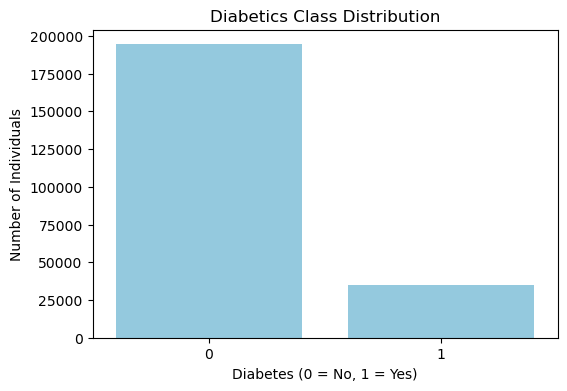

In [42]:
# Plot class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Diabetes_binary', data=df, color='skyblue')
plt.title('Diabetics Class Distribution')
plt.xlabel('Diabetes (0 = No, 1 = Yes)')
plt.ylabel('Number of Individuals')
plt.show()

The target is imbalanced. I need to address this later.

**Distribution of numeric columns**

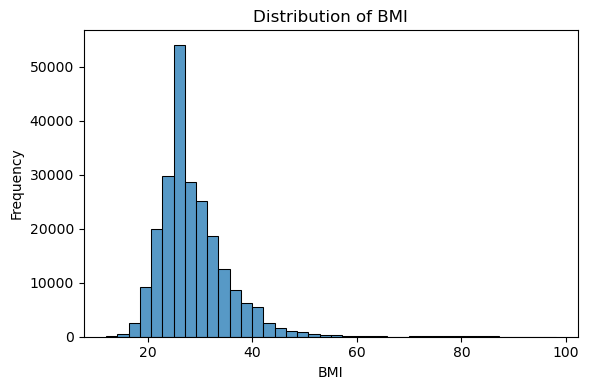

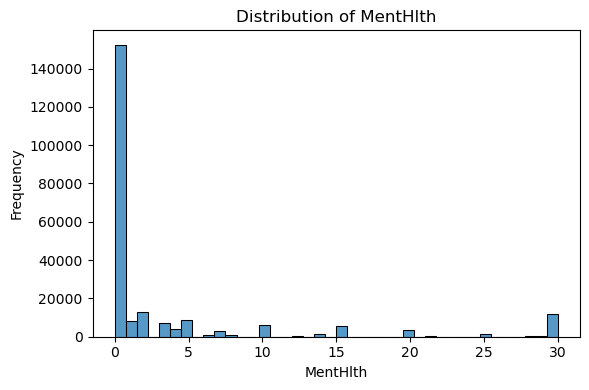

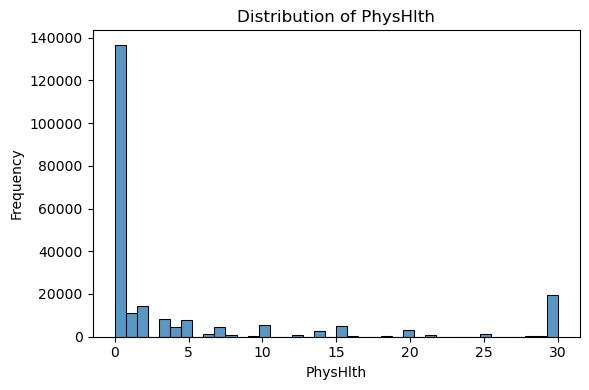

In [15]:
# Define your numeric columns
numeric_cols = ['BMI', 'MentHlth', 'PhysHlth']

# Loop through each and plot histogram
for one_col in numeric_cols:
    plt.figure(figsize=(6, 4))
    
    sns.histplot(
        data=df,
        x=one_col,
        bins=40,          
        edgecolor='black')
    
    plt.title(f'Distribution of {one_col}')
    plt.xlabel(one_col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

**Boxplot of BMI**

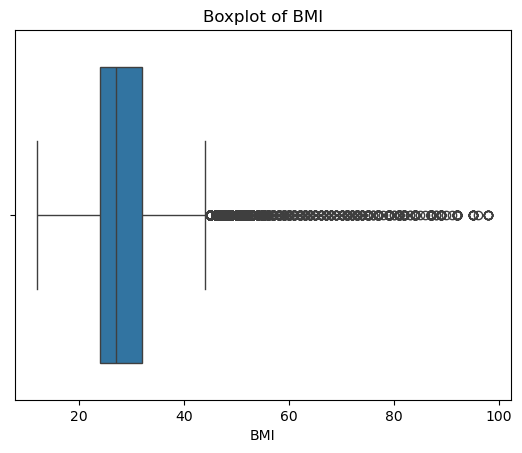

In [16]:
sns.boxplot(x=df["BMI"])
plt.title("Boxplot of BMI")
plt.show()

In health data, extreme values are often real and clinically meaningful. So I will not remove outliers.

**Diabetes Proportion by Binary Features**

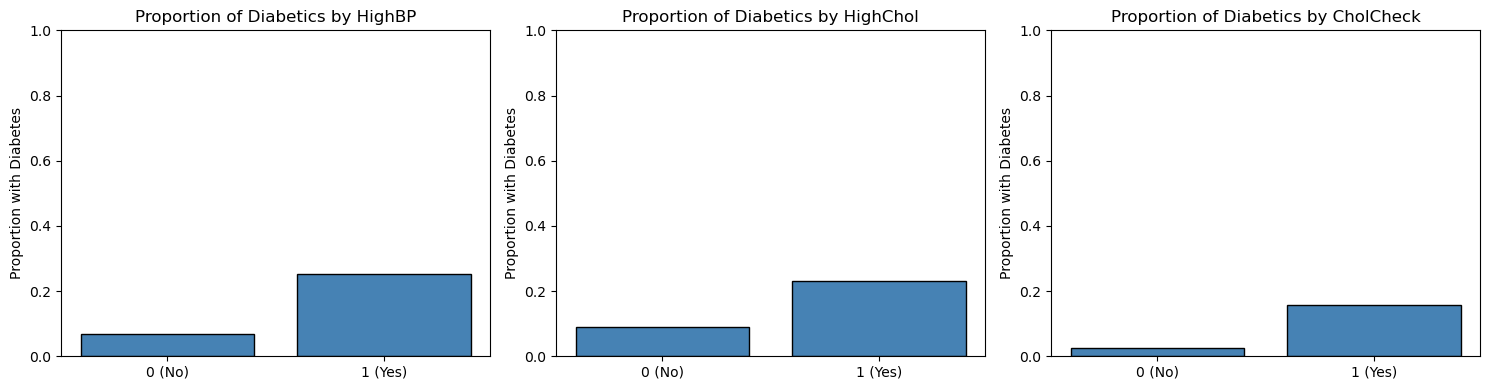

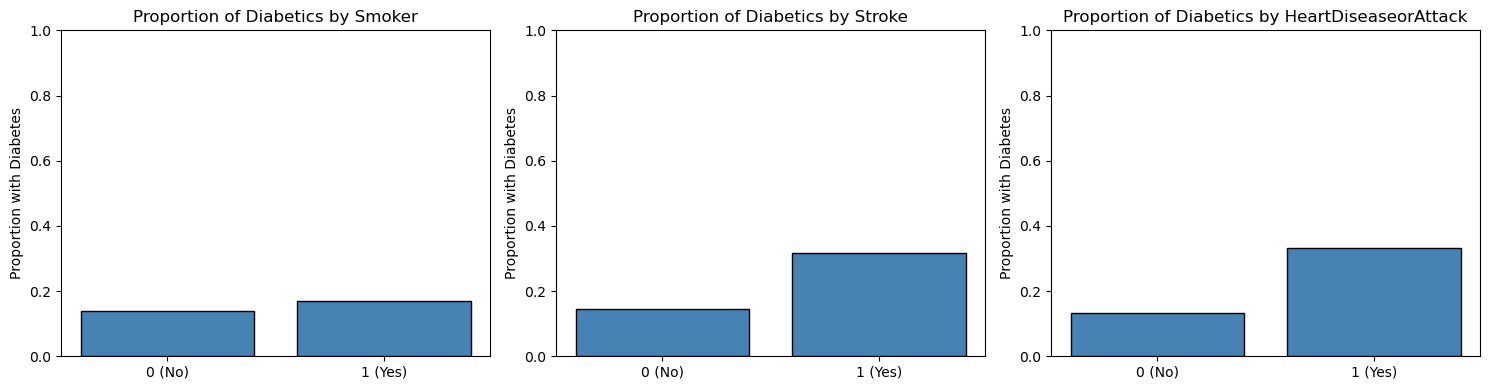

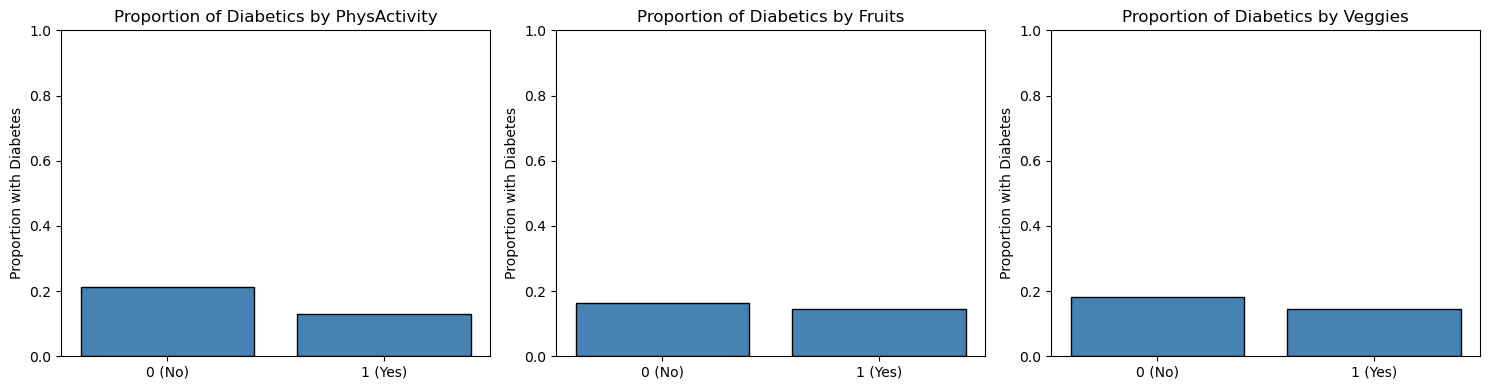

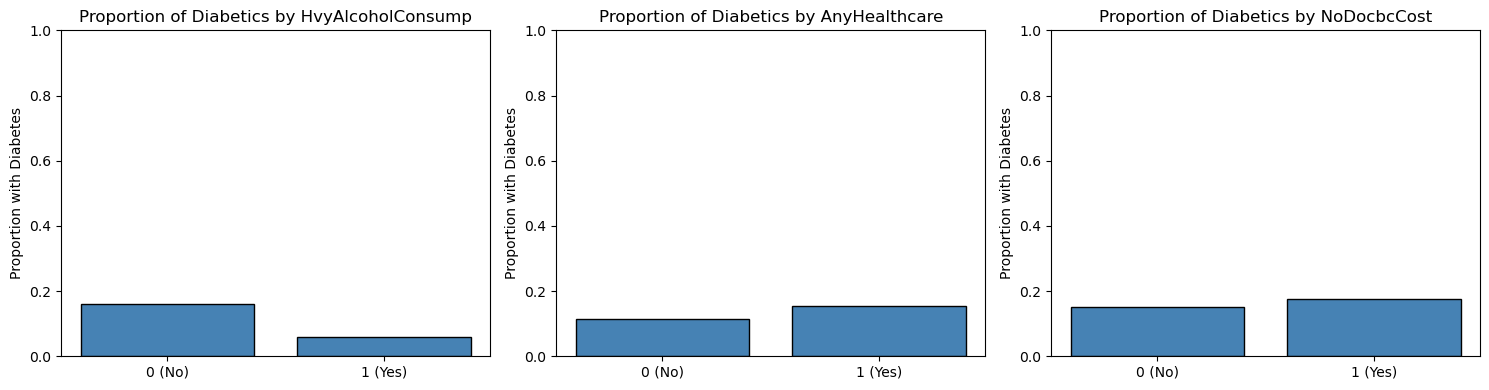

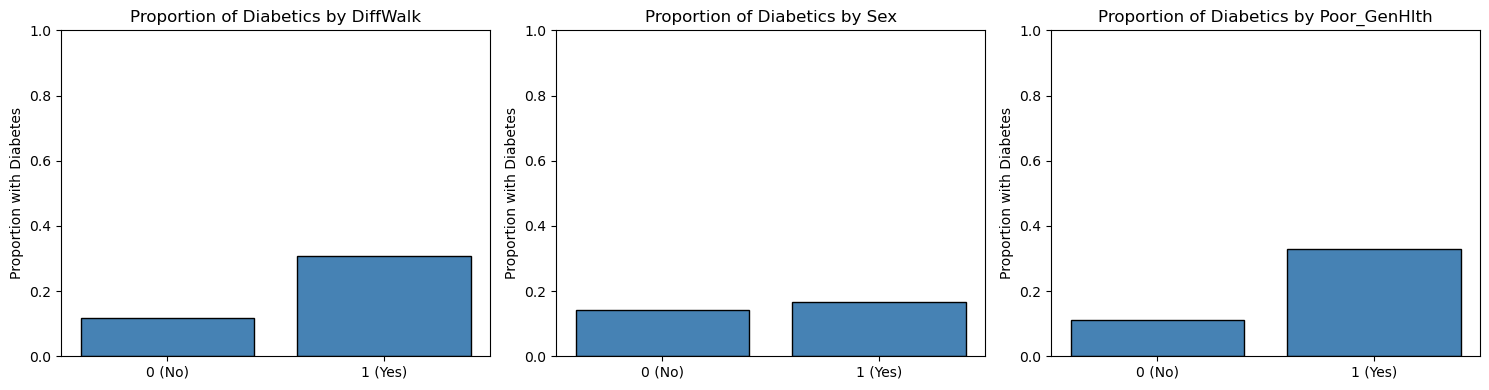

In [38]:
for chunk in [binary_cols[i:i+3] for i in range(0, len(binary_cols), 3)]:
    plt.figure(figsize=(15, 4))
    
    for idx, col in enumerate(chunk):
        plt.subplot(1, 3, idx+1)
        
        # Calculate proportions for each category
        proportions = df.groupby(col)[target_col].mean()
        
        # Create bar plot
        plt.bar(proportions.index, proportions.values, color='steelblue', edgecolor='black')
        plt.title(f"Proportion of Diabetics by {col}")
        plt.ylabel("Proportion with Diabetes")
        plt.ylim(0, 1)
        plt.xticks([0, 1], ["0 (No)", "1 (Yes)"])
    
    plt.tight_layout()
    plt.show()

Based on the above figures, many things make sense. For example, the proportion of diabetes is higher for people with high blood pressure than for people with normal blood pressure. But I am surprised that the proportion of diabetes is lower for heavy alcohol consuming people than for non-heavy alcohol consuming people. I see lots of prospects for feature engineering. I will do this in the Feature Engineering section.

**Proportion of Diabetes Across Ordinal Features**

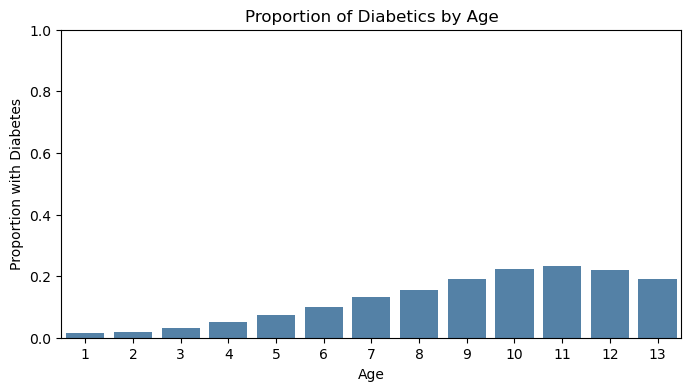

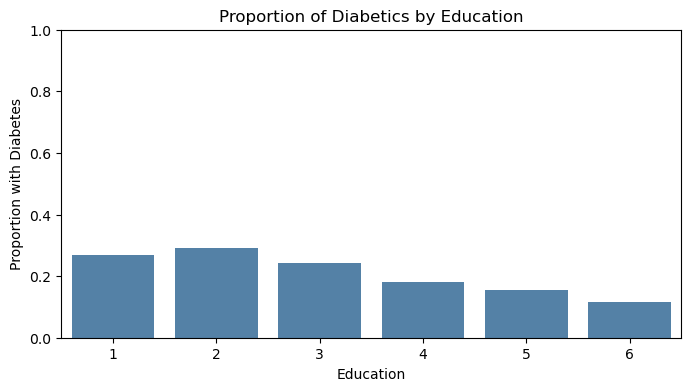

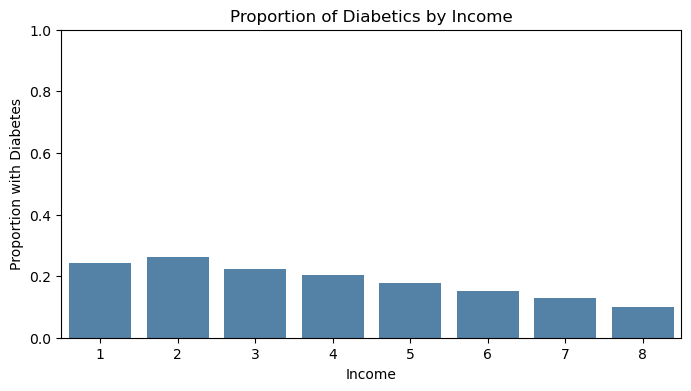

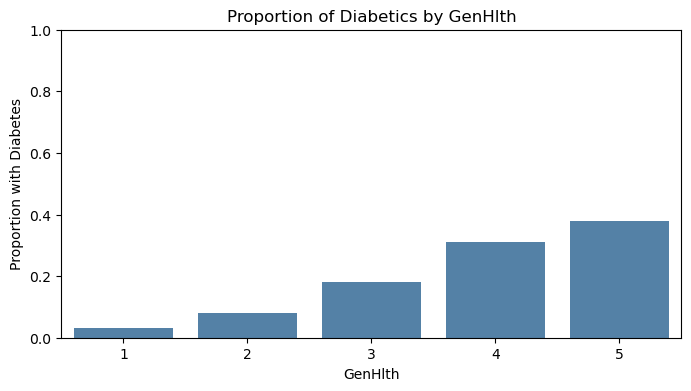

In [18]:
ordinal_cols = ['Age', 'Education', 'Income', 'GenHlth']
target_col = 'Diabetes_binary'

for col in ordinal_cols:
    plt.figure(figsize=(8, 4))
    rates = df.groupby(col)[target_col].mean().reset_index()
    sns.barplot(x=col, y=target_col, data=rates, color='steelblue')
    plt.title(f"Proportion of Diabetics by {col}")
    plt.xlabel(col)
    plt.ylabel("Proportion with Diabetes")
    plt.ylim(0, 1)
    plt.show()


Based on the above figures, I can create a binary column from GenHlth. I also see opportunities for additional feature engineering, which I will address in that section.

## Feature Engineering

In [19]:
# Create BMI-Age interaction feature as older people with high BMI may be at 
# higher diabetes risk since age makes individuals more susceptible to disease.
df['BMI_Age'] = df['BMI'] * df['Age']

In [20]:
# If people have multiple conditions, their chance of diabetes might be higher. 
# Creating a combined risk score by summing key health conditions.
df["Clinical_Risk"] = (
    df["HighBP"] +
    df["HighChol"] +
    df["HeartDiseaseorAttack"] +
    df["DiffWalk"])

In [21]:
# Create binary column based on GenHlth to get strong signal
df['Poor_GenHlth'] = (df['GenHlth'] >= 4).astype(int)

In [22]:
# Create unhealthy lifestyle score by summing poor lifestyle choices 
# as multiple unhealthy behaviors increase diabetes risk cumulatively.
df['Unhealthy_Lifestyle_Score'] = (
   df['Smoker'] +
   (1 - df['Fruits']) +        # Low fruit intake
   (1 - df['Veggies']) +       # Low vegetable intake
   (1 - df['PhysActivity']))    # Sedentary lifestyle

In [23]:
# low education, low income, and poor general health 
# may together increase diabetes risk
df['SocioHealth_Risk'] = (
    (df['Education'] <= 3).astype(int) + 
    (df['Income'] <= 3).astype(int) + 
    (df['GenHlth'] >= 4).astype(int))

**Feature Correlation Heatmap**

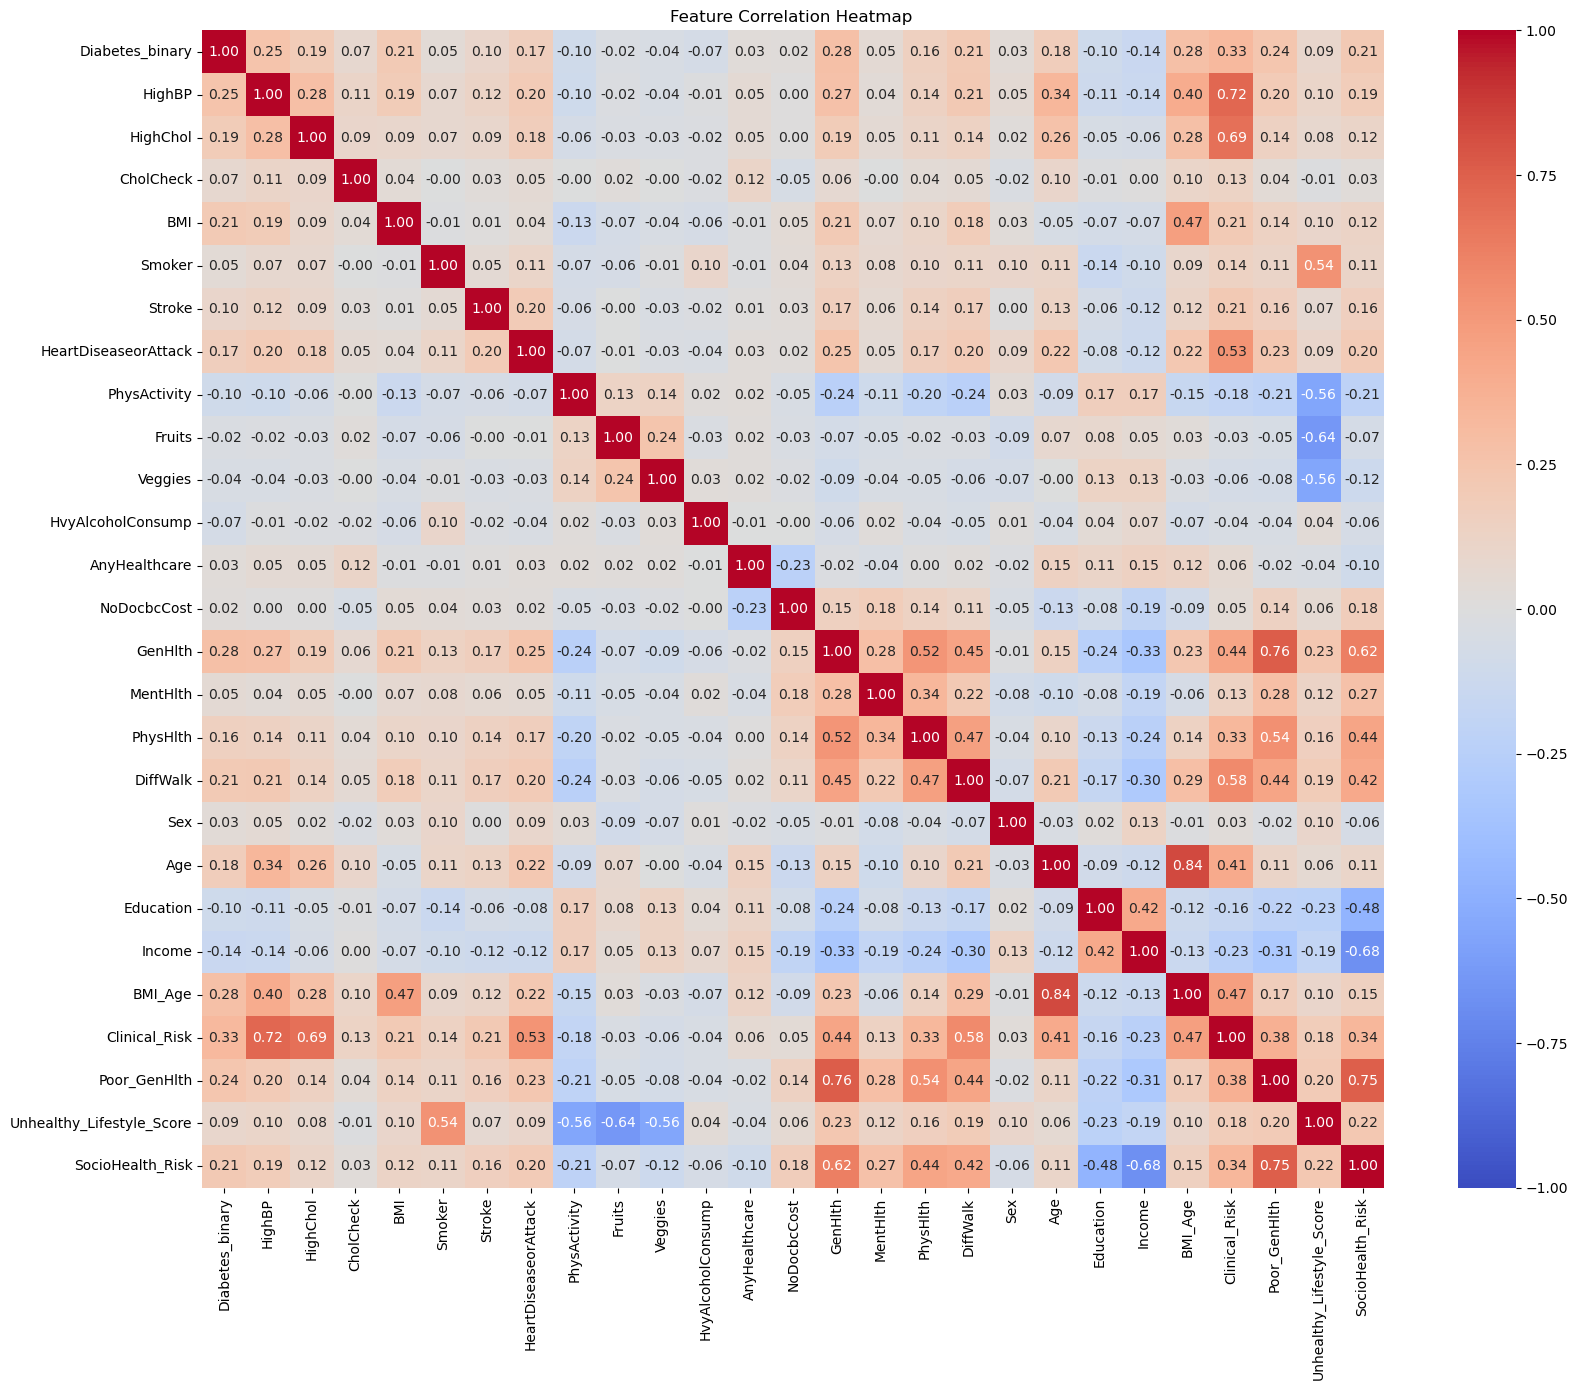

In [24]:
# Select only numeric columns for correlation
numeric_cols = df.select_dtypes(include=[np.number]).columns
heatmap_data = df[numeric_cols].corr()

# Create the heatmap 
plt.figure(figsize=(17, 14))
sns.heatmap(
    heatmap_data,
    cmap='coolwarm',   
    annot=True,        
    fmt=".2f",         
    vmin=-1,           
    vmax=1)

plt.title('Feature Correlation Heatmap ')
plt.tight_layout()
plt.show()

Using a correlation threshold of |0.9|, no significant multicollinearity was detected among the features.

**Feature-Target Correlation Analysis**

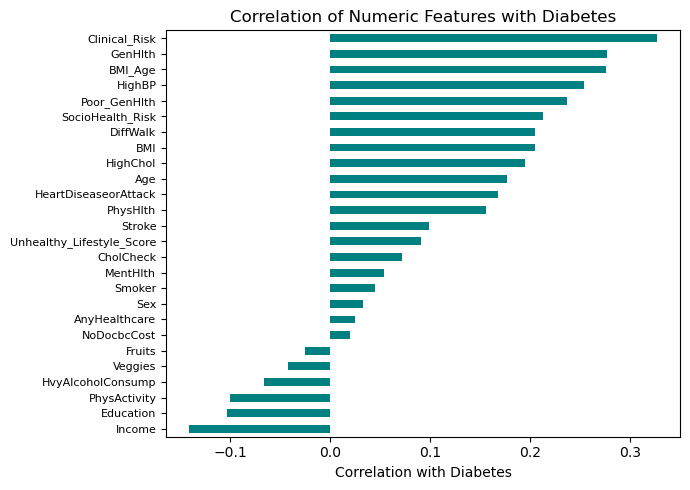

In [25]:
# Correlation of numeric features with target
target_col = 'Diabetes_binary'

# Select numeric features (excluding target itself)
num_features = df.select_dtypes(include='number').columns.drop(target_col)

# Compute correlations directly with target
corr = df[num_features].corrwith(df[target_col]).sort_values()

# Plot
plt.figure(figsize=(7, 5))
corr.plot.barh(color='teal')
plt.xlabel('Correlation with Diabetes')
plt.title('Correlation of Numeric Features with Diabetes')
plt.yticks(fontsize=8)  
plt.tight_layout()
plt.show()


In [26]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'BMI_Age', 'Clinical_Risk', 'Poor_GenHlth', 'Unhealthy_Lifestyle_Score',
       'SocioHealth_Risk'],
      dtype='object')

In [27]:
# Quick look
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 229474 entries, 0 to 253679
Data columns (total 27 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Diabetes_binary            229474 non-null  int64  
 1   HighBP                     229474 non-null  int64  
 2   HighChol                   229474 non-null  int64  
 3   CholCheck                  229474 non-null  int64  
 4   BMI                        229474 non-null  float64
 5   Smoker                     229474 non-null  int64  
 6   Stroke                     229474 non-null  int64  
 7   HeartDiseaseorAttack       229474 non-null  int64  
 8   PhysActivity               229474 non-null  int64  
 9   Fruits                     229474 non-null  int64  
 10  Veggies                    229474 non-null  int64  
 11  HvyAlcoholConsump          229474 non-null  int64  
 12  AnyHealthcare              229474 non-null  int64  
 13  NoDocbcCost                229474 

In [28]:
df.sample(5).T

,202399,239297,3584,77317,90957
Diabetes_binary,0.0,1.0,1.0,0.0,0.0
HighBP,0.0,1.0,0.0,1.0,0.0
HighChol,1.0,1.0,1.0,1.0,0.0
CholCheck,1.0,1.0,1.0,1.0,0.0
BMI,28.0,27.0,35.0,18.0,22.0
Smoker,1.0,1.0,0.0,1.0,1.0
Stroke,0.0,0.0,0.0,0.0,0.0
HeartDiseaseorAttack,0.0,1.0,0.0,0.0,0.0
PhysActivity,1.0,0.0,0.0,1.0,1.0
Fruits,1.0,0.0,0.0,0.0,1.0


## Model Building and Training

SPLIT DATA

In [29]:
# Define predictor variables (features) and target variable
X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']

# Split into 80% train+val and 20% test, stratified by target
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=99,
    stratify=y
)

# Further split train+val into 75% train and 25% val (= 60% train, 20% val, 20% test overall), stratified by target
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val,
    y_train_val,
    test_size=0.25,
    random_state=99,
    stratify=y_train_val)


FEATURE CATEGORIZATION

In [30]:
# Binary features (0/1) - DON'T scale for any model
binary_cols = [
    'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 
    'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
    'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 
    'Sex', 'Poor_GenHlth'
]

# Ordinal features - scale for linear models 
ordinal_cols = [
    'Age',        # 1-13 (age groups)
    'Education',  # 1-6 (education levels)
    'Income',     # 1-8 (income brackets)
    'GenHlth'     # 1-5 (health rating)
]

# Continuous/numeric features - scale for linear models 
continuous_cols = [
    'BMI',        # 15-50 range
    'MentHlth',   # 0-30 days
    'PhysHlth'    # 0-30 days
]

# Engineered features (counts/interactions) - scale for linear models 
engineered_cols = [
    'BMI_Age',                    # interaction term
    'Clinical_Risk',              # sum of binary features
    'Unhealthy_Lifestyle_Score',  # sum of binary features
    'SocioHealth_Risk'            # sum of binary features
]

# Features that need scaling for linear models and neural networks
cols_to_scale = ordinal_cols + continuous_cols + engineered_cols

# Features that should NEVER be scaled
cols_no_scale = binary_cols

print(f"Binary columns (don't scale): {len(binary_cols)}")
print(f"Columns to scale for linear: {len(cols_to_scale)}")
print(f"Total features: {len(binary_cols) + len(cols_to_scale)}")

Binary columns (don't scale): 15
Columns to scale for linear: 11
Total features: 26


PREPROCESSING PIPELINES

In [31]:
# Preprocessor for Logistic Regression  (requires scaling)
preprocessor_lr = ColumnTransformer([
    ('scale', StandardScaler(), cols_to_scale),           # Scale ordinal, continuous, engineered features
    ('binary', 'passthrough', cols_no_scale)             # Keep binary features as-is
])

# Preprocessor for Tree-Based Models (no scaling needed)
preprocessor_tree = ColumnTransformer([
    ('all_features', 'passthrough', cols_to_scale + cols_no_scale)  # Keep all features as-is
])

print("Preprocessing pipelines configured")

Preprocessing pipelines configured


MODEL CONFIGURATION

In [32]:
# Define models with their specific preprocessing requirements and hyperparameter grids
models = {
   'LogisticRegression': {
       'model': LogisticRegression(
           random_state=99, 
           max_iter=1000,              # Increase iterations for convergence
           class_weight='balanced'     # Handle class imbalance
       ),
       'preprocessor': preprocessor_lr,  # Requires scaling
       'param_grid': {
           'model__C': [0.01, 0.1, 1, 10],      # Regularization strength
           'model__penalty': ['l2'],             # L2 regularization
           'model__solver': ['lbfgs']            # Solver for L2 penalty
       }
   },
   
   'DecisionTree': {
       'model': DecisionTreeClassifier(
           random_state=99, 
           class_weight='balanced'     # Handle class imbalance
       ),
       'preprocessor': preprocessor_tree,  # No scaling needed
       'param_grid': {
           'model__max_depth': [3, 5, 7, None],        # Tree depth control
           'model__min_samples_split': [2, 5, 10],     # Min samples to split
           'model__min_samples_leaf': [1, 2, 4]        # Min samples in leaf
       }
   },
   
   'RandomForest': {
       'model': RandomForestClassifier(
           random_state=99, 
           class_weight='balanced'     # Handle class imbalance
       ),
       'preprocessor': preprocessor_tree,  # No scaling needed
       'param_grid': {
           'model__n_estimators': [100, 200],          # Number of trees
           'model__max_depth': [5, 10, None],          # Tree depth control
           'model__min_samples_split': [2, 5],         # Min samples to split
           'model__min_samples_leaf': [1, 2]           # Min samples in leaf
       }
   },
   
   'XGBoost': {
       'model': XGBClassifier(
           random_state=99,
           eval_metric='logloss',          
       ),
       'preprocessor': preprocessor_tree,  # No scaling needed
       'param_grid': {
           'model__n_estimators': [100, 200],      # Number of boosting rounds
           'model__max_depth': [3, 5, 7],          # Tree depth
           'model__learning_rate': [0.01, 0.1],    # Learning rate
           'model__subsample': [0.8, 1.0]          # Sample ratio
       }
   },
   
   'CatBoost': {
       'model': CatBoostClassifier(
           random_state=99, 
           verbose=0,                      # Suppress output
           auto_class_weights='Balanced',  # Handle class imbalance
           early_stopping_rounds=50        # Prevent overfitting
       ),
       'preprocessor': None,  # CatBoost handles categorical features natively
       'param_grid': {
           'model__iterations': [100, 200],        # Number of boosting iterations
           'model__depth': [4, 6, 8],              # Tree depth
           'model__learning_rate': [0.01, 0.1],    # Learning rate
           'model__l2_leaf_reg': [1, 3]            # L2 regularization
       }
   }
}

print(f"{len(models)} models configured for training")

5 models configured for training


HYPERPARAMETER TUNING AND MODEL EVALUATION

In [33]:
results = []
print("\n" + "="*60)
print("STARTING HYPERPARAMETER TUNING")
print("="*60)

for model_name, config in models.items():
   print(f"Tuning {model_name}...")
   
   # Create standard pipeline with preprocessor + model for all models
   pipeline = Pipeline([
       ('preprocessor', config['preprocessor']),
       ('model', config['model'])
   ])
   
   # Perform randomized search with cross-validation
   random_search = RandomizedSearchCV(
       estimator=pipeline,
       param_distributions=config['param_grid'],
       cv=3,                          # 3-fold cross-validation
       scoring='roc_auc',             # Optimize for ROC-AUC
       n_jobs=-1,                     
       n_iter=20,                     # Number of random combinations to try
       random_state=99,               
       return_train_score=True        
   )
   
   # Fit the randomized search on training data
   random_search.fit(X_train, y_train)
   
   # Get the best model from randomized search
   best_model = random_search.best_estimator_
   
   # Generate predictions on training and validation sets
   y_train_proba = best_model.predict_proba(X_train)[:, 1]  
   y_val_proba = best_model.predict_proba(X_val)[:, 1]
   
   # Calculate performance metrics
   train_roc_auc = roc_auc_score(y_train, y_train_proba)
   val_roc_auc = roc_auc_score(y_val, y_val_proba)
   
   # Store results for comparison
   results.append({
       'Model': model_name,
       'Best Parameters': random_search.best_params_,
       'Train ROC-AUC': train_roc_auc,
       'Validation ROC-AUC': val_roc_auc,
       'Best Model': best_model
   })
   
   # Print model results
   print("\n" + "-"*60)
   print(f"Results for {model_name}")
   print("-"*60)
   print(f"   Best Parameters: {random_search.best_params_}")
   print(f"   Train ROC-AUC: {train_roc_auc:.4f} | Validation ROC-AUC: {val_roc_auc:.4f}")

print("\n" + "="*60)
print("HYPERPARAMETER TUNING COMPLETED")
print("="*60)


STARTING HYPERPARAMETER TUNING
Tuning LogisticRegression...


/Users/ashokmaharjan/miniconda/envs/data_science/lib/python3.12/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



------------------------------------------------------------
Results for LogisticRegression
------------------------------------------------------------
   Best Parameters: {'model__solver': 'lbfgs', 'model__penalty': 'l2', 'model__C': 1}
   Train ROC-AUC: 0.8105 | Validation ROC-AUC: 0.8118
Tuning DecisionTree...

------------------------------------------------------------
Results for DecisionTree
------------------------------------------------------------
   Best Parameters: {'model__min_samples_split': 5, 'model__min_samples_leaf': 4, 'model__max_depth': 7}
   Train ROC-AUC: 0.8101 | Validation ROC-AUC: 0.8033
Tuning RandomForest...

------------------------------------------------------------
Results for RandomForest
------------------------------------------------------------
   Best Parameters: {'model__n_estimators': 200, 'model__min_samples_split': 2, 'model__min_samples_leaf': 2, 'model__max_depth': 10}
   Train ROC-AUC: 0.8382 | Validation ROC-AUC: 0.8146
Tuning XGBoost...

MODEL COMPARISON AND SELECTION

In [34]:
print("\n" + "="*60)
print("MODEL COMPARISON RESULTS")
print("="*60)

# Create results DataFrame
results_df = pd.DataFrame(results)

# Round and format the table - only ROC-AUC metrics
comparison_cols = ['Model', 'Train ROC-AUC', 'Validation ROC-AUC']
rounded_df = results_df[comparison_cols].round(4)

# Align column widths for better readability
print(rounded_df.to_string(index=False, justify='center'))

# Highlight best model based on Validation ROC-AUC
best_model_info = results_df.loc[results_df['Validation ROC-AUC'].idxmax()]
print("\n" + "-"*60)
print(f"BEST MODEL: {best_model_info['Model']}")
print(f"Validation ROC-AUC: {best_model_info['Validation ROC-AUC']:.4f}")
print("-"*60)


MODEL COMPARISON RESULTS
      Model         Train ROC-AUC  Validation ROC-AUC
LogisticRegression     0.8105            0.8118      
      DecisionTree     0.8101            0.8033      
      RandomForest     0.8382            0.8146      
           XGBoost     0.8215            0.8179      
          CatBoost     0.8215            0.8184      

------------------------------------------------------------
BEST MODEL: CatBoost
Validation ROC-AUC: 0.8184
------------------------------------------------------------


As we can see, for all models except Logistic Regression, the training ROC-AUC score is slightly higher than the validation ROC-AUC score. This is normal in machine learning. So we can say that there is no overfitting in the models

FINAL EVALUATION ON TEST SET

In [35]:
print(f"\n" + "="*60)
print("FINAL TEST SET EVALUATION")
print("="*60)

# Use best model to predict on test set
best_model = best_model_info['Best Model']
y_test_proba = best_model.predict_proba(X_test)[:, 1]

# Calculate final test metrics
test_roc_auc = roc_auc_score(y_test, y_test_proba)

print(f"FINAL RESULTS:")
print(f" Model: {best_model_info['Model']}")
print(f" Test ROC-AUC: {test_roc_auc:.4f}")

print("\n" + "-"*60)
print("This represents the final, unbiased performance estimate on unseen data.")
print("-"*60)


FINAL TEST SET EVALUATION
FINAL RESULTS:
 Model: CatBoost
 Test ROC-AUC: 0.8125

------------------------------------------------------------
This represents the final, unbiased performance estimate on unseen data.
------------------------------------------------------------


VISUALIZE THE RESULT

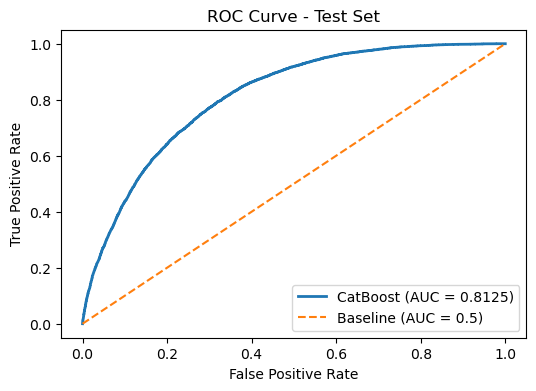

In [36]:
# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_test_proba)

# Create the plot
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, lw=2, label=f'{best_model_info["Model"]} (AUC = {test_roc_auc:.4f})')
plt.plot([0, 1], [0, 1], '--', label='Baseline (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Test Set')
plt.legend()
plt.show()

## Conclusion
I was able to develop a machine learning model to predict diabetes risk using lifestyle and health factors. CatBoost emerged as the best performer with a test ROC-AUC of 0.8125, demonstrating decent predictive capability for identifying at-risk individuals. The feature engineering process proved helpful, as engineered features showed strong correlations with diabetes outcomes. This predictive model can serve as a valuable tool for early diabetes screening, potentially enabling timely interventions that could improve health outcomes and reduce the burden of this growing health crisis.